In [13]:
import matplotlib.pyplot as plt
from lib.ENSEMBLE import Ensemble
import warnings
warnings.filterwarnings('ignore')

In [2]:
ensemble = Ensemble(
    isfParams={'outliers_fraction':0.015, 'n_estimators':100, 'max_samples':256},
    lofParams={'n_neighbors':5, 'novelty':True},
    time='2019/8/30')

In [3]:
ensemble.show('red', ['日期','時間','rank','MD','LOF','ISF'])

,日期,時間,rank,MD,LOF,ISF
66,2019/5/2,09:45:00,red,True,True,True
96,2019/5/6,09:15:00,red,True,True,True
146,2019/5/9,09:45:00,red,True,True,True
192,2019/5/14,09:15:00,red,True,True,True
606,2019/6/19,12:45:00,red,True,True,True
927,2019/7/17,13:00:00,red,True,True,True
1007,2019/7/24,13:00:00,red,True,True,True
1108,2019/8/2,10:15:00,red,True,True,True
1537,2019/9/11,09:30:00,red,True,True,True
1568,2019/9/16,09:15:00,red,True,True,True


In [11]:
comList = ensemble.getCompany()
metricListA = []
for i in comList:
    metricListA.append(ensemble.metric(benchmark=i))

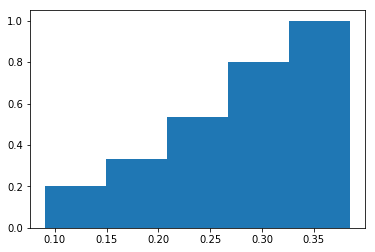

In [12]:
plt.hist(x=metricListA, bins='auto', cumulative=True, density=True)
plt.show()

In [7]:
class NewEnsemble(Ensemble):
    def __init__(self):
        Ensemble.__init__(self)
            
    def metric(self, benchmark='大立光_close', stdNum=2):
        if 'close' not in benchmark:
            benchmark+='_close'
        self.metric_df=self.df
        self.metric_df['close']=self._md.get(benchmark)
        self.metric_df['diff']=self.metric_df['close'].diff().shift(-1)
        self.metric_df.fillna(method='ffill', inplace=True)
        total_anomaly_num = sum(abs(self.metric_df['diff']))
        discovered_anomaly_num = sum(abs(self.metric_df['diff'])*self.metric_df['anomaly'])
        self.measure = discovered_anomaly_num/total_anomaly_num

        return self.measure

In [8]:
ne=NewEnsemble()

In [15]:
metricListB = []
for i in comList:
    metricListB.append(ne.metric(benchmark=i))

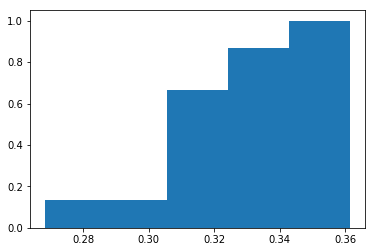

In [19]:
plt.hist(x=metricListB, bins='auto', cumulative=True, density=True)
plt.show()

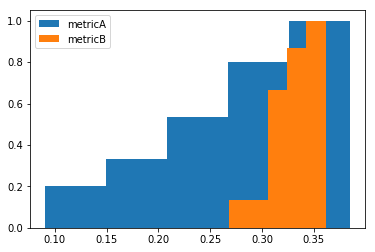

In [18]:
plt.hist(x=metricListA, bins='auto', cumulative=True, density=True, label='metricA')
plt.hist(x=metricListB, bins='auto', cumulative=True, density=True, label='metricB')
plt.legend()
plt.show()

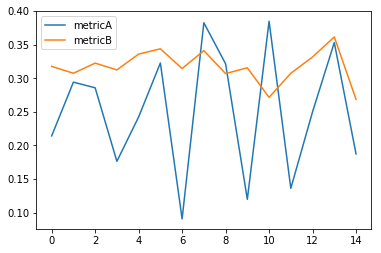

In [21]:
plt.plot(metricListA, label='metricA')
plt.plot(metricListB, label='metricB')
plt.legend()
plt.show()